In [3]:
# Importamos librerías de análisis de datos
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as p

In [4]:
data = pd.read_csv("../data/train.csv", index_col="id", parse_dates=["fecha"]).reset_index()
data["tipodepropiedad"] = data["tipodepropiedad"].map(lambda x: str(x).lower())

In [5]:
#uso categorías de Lucio
tipo_vivienda = ["apartamento", "casa en condominio", "casa",
                 "villa", "duplex", "departamento compartido", "hospedaje", "quinta vacacional"]
tipo_comercial = ["terreno comercial", "local comercial", "oficina comercial", 
                  "local en centro comercial", "bodega comercial", "inmuebles productivos urbanos"]

tipo_inversion = ["casa uso de suelo", "terreno", "edificio", "huerta", "lote", "garage", "otros", "nave industrial",  "rancho"]
undefined = ["terreno", "edificio", "casa uso de suelo", "otros", "nave industrial", "rancho", "nan", 
             "huerta", "lote", "garage"]  

In [6]:
def get_ancester_category(tipo_de_propiedad):
    if (tipo_de_propiedad in tipo_inversion): return "inversion"

    if (tipo_de_propiedad in tipo_comercial): return "comercial"

    if (tipo_de_propiedad in tipo_vivienda): return "vivienda"

    return "undefined"

In [7]:
data["categoria_padre"] = data["tipodepropiedad"].apply(lambda x: get_ancester_category(x))

# Habitaciones y baños en vivienda

Text(33.0, 0.5, 'Baños')

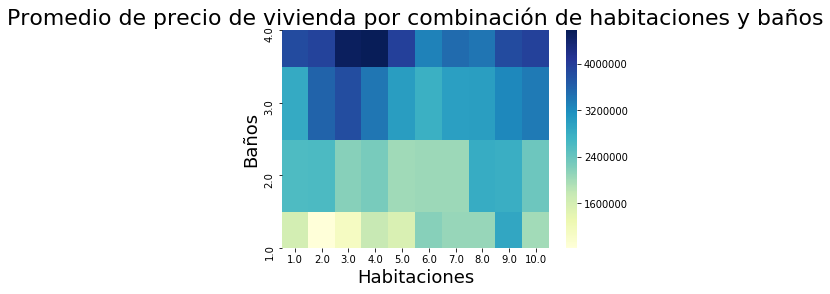

In [8]:
viviendas = data[data['categoria_padre'] == 'vivienda']
#habitacionesbaños_for_heatmap = data[data['categoria_padre'] == 'vivienda'].pivot_table(index='banos', columns='habitaciones', values='precio', aggfunc='mean')
habitacionesbaños_for_heatmap = viviendas.pivot_table(index='banos', columns='habitaciones', values='precio', aggfunc='mean')
g = sb.heatmap(habitacionesbaños_for_heatmap,  cmap="YlGnBu")
g.invert_yaxis()
g.set_title("Promedio de precio de vivienda por combinación de habitaciones y baños", fontsize=22)
g.set_xlabel("Habitaciones",fontsize=18)
g.set_ylabel("Baños", fontsize=18)

##Habitcicones y garages en vivienda

Text(33.0, 0.5, 'Garage')

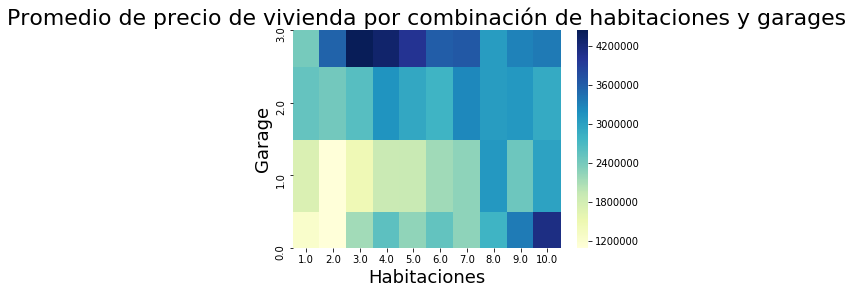

In [9]:
habitaciones_garages_for_heatmap = viviendas.pivot_table(index='garages', columns='habitaciones', values='precio', aggfunc='mean')
g = sb.heatmap(habitaciones_garages_for_heatmap,  cmap="YlGnBu")
g.invert_yaxis()
g.set_title("Promedio de precio de vivienda por combinación de habitaciones y garages", fontsize=22)
g.set_xlabel("Habitaciones",fontsize=18)
g.set_ylabel("Garage", fontsize=18)

##Distribución por categoría según precio

In [10]:
#cuantiles = data.quantile([0.2, 0.4, 0.6, 0.8])
cuantiles_precio = data['precio'].quantile([0.2, 0.4, 0.6, 0.8])
datos = data.loc[data['precio']< cuantiles_precio[0.2]]
datos.shape

(47996, 24)

Text(0, 0.5, 'Frecuencia')

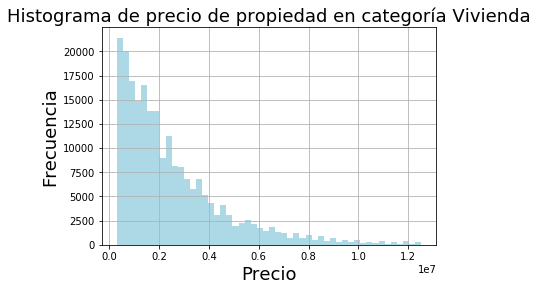

In [11]:
g = viviendas['precio'].plot.hist(bins=50, color='lightblue', grid=True)
g.set_title("Histograma de precio de propiedad en categoría Vivienda", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

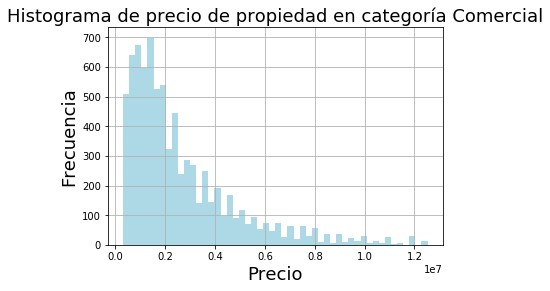

In [12]:
comercios = data[data['categoria_padre'] == 'comercial']
g = comercios['precio'].plot.hist(bins=50, color='lightblue', grid=True)
g.set_title("Histograma de precio de propiedad en categoría Comercial", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

Text(0, 0.5, 'Frecuencia')

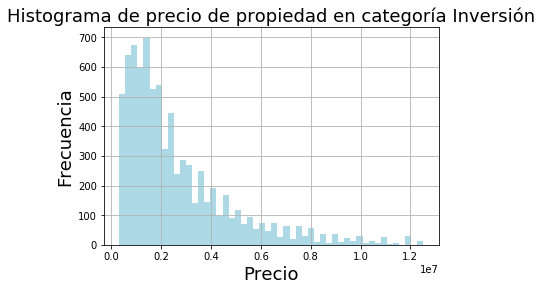

In [13]:
inversion = data[data['categoria_padre'] == 'inversion']
g = comercios['precio'].plot.hist(bins=50, color='lightblue', grid=True)
g.set_title("Histograma de precio de propiedad en categoría Inversión", fontsize=18)
g.set_xlabel("Precio",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)

In [14]:
def get_cuantil(precio, cuantiles):
    if precio < cuantiles[0.2]:
        return "<"+str(cuantiles[0.2])
    if (precio >= cuantiles[0.2]) and (precio < cuantiles[0.4]):
        return "["+str(cuantiles[0.2])+" , "+str(cuantiles[0.4])+")"
    if (precio >= cuantiles[0.4]) and (precio < cuantiles[0.6]):
        return "["+str(cuantiles[0.4])+" , "+str(cuantiles[0.6])+")"
    if (precio >= cuantiles[0.6]) and (precio < cuantiles[0.8]):
        return "["+str(cuantiles[0.6])+" , "+str(cuantiles[0.8])+")"
    if (precio >= cuantiles[0.8]):
        return ">"+str(cuantiles[0.8])

In [15]:
data["cuantil"] = data["precio"].apply(lambda x: get_cuantil(x, cuantiles_precio))

Text(0, 0.5, 'Cantidad de propiedades')

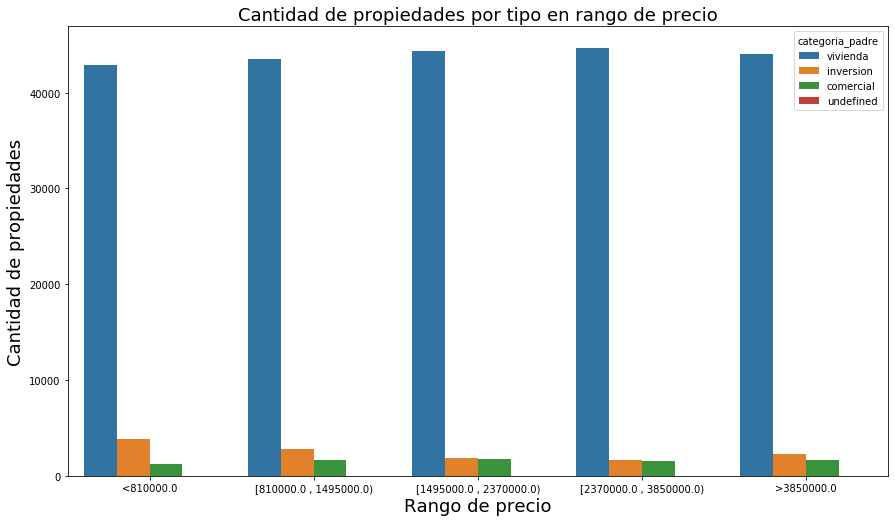

In [17]:
fig,ax = p.subplots()
fig.set_size_inches(14.7, 8.27)

g = sb.countplot(x = "cuantil", hue = "categoria_padre", data = data, ax = ax,order=['<810000.0','[810000.0 , 1495000.0)','[1495000.0 , 2370000.0)','[2370000.0 , 3850000.0)','>3850000.0'])
g.set_title("Cantidad de propiedades por tipo en rango de precio", fontsize=18)
g.set_xlabel("Rango de precio", fontsize = 18)
g.set_ylabel("Cantidad de propiedades", fontsize = 18)